In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('Volve-production-data.xlsx',sheet_name='Daily Production Data')

In [4]:
df.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [5]:
df = df.drop(['WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'AVG_CHOKE_UOM',
       'FLOW_KIND','AVG_ANNULUS_PRESS'], axis=1)

In [6]:
pd.unique(df['WELL_TYPE'])

array(['WI', 'OP'], dtype=object)

In [7]:
F1C = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-1 C'].drop(['NPD_WELL_BORE_NAME','WELL_TYPE','BORE_WI_VOL'], axis=1)
F11H = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-11'].drop(['NPD_WELL_BORE_NAME','WELL_TYPE','BORE_WI_VOL'], axis=1)
F12H = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-12'].drop(['NPD_WELL_BORE_NAME','WELL_TYPE','BORE_WI_VOL'], axis=1)
F14H = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-14'].drop(['NPD_WELL_BORE_NAME','WELL_TYPE','BORE_WI_VOL'], axis=1)
F15D = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-15 D'].drop(['NPD_WELL_BORE_NAME','WELL_TYPE','BORE_WI_VOL'], axis=1)
F4AH = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-4'].drop(['NPD_WELL_BORE_NAME','WELL_TYPE','BORE_WI_VOL'], axis=1)
F5AH = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-5'].drop(['NPD_WELL_BORE_NAME','WELL_TYPE','BORE_WI_VOL'], axis=1)

In [8]:
producers = [F1C, F11H, F12H, F14H, F15D]
for well in producers:
    for column in well:
        nulls = sum(well[column].isnull())
        if nulls > 0:
            print(column, "has", nulls, "null values" )
    print('\n')

AVG_DOWNHOLE_PRESSURE has 3 null values
AVG_DOWNHOLE_TEMPERATURE has 3 null values
AVG_DP_TUBING has 3 null values


AVG_DOWNHOLE_PRESSURE has 6 null values
AVG_DOWNHOLE_TEMPERATURE has 6 null values
AVG_DP_TUBING has 6 null values
AVG_CHOKE_SIZE_P has 2 null values
AVG_WHP_P has 6 null values
AVG_WHT_P has 6 null values
DP_CHOKE_SIZE has 6 null values


AVG_DOWNHOLE_PRESSURE has 6 null values
AVG_DOWNHOLE_TEMPERATURE has 6 null values
AVG_DP_TUBING has 6 null values
AVG_CHOKE_SIZE_P has 44 null values


AVG_DOWNHOLE_PRESSURE has 6 null values
AVG_DOWNHOLE_TEMPERATURE has 6 null values
AVG_DP_TUBING has 6 null values
AVG_CHOKE_SIZE_P has 196 null values






In [9]:
#getting rid of nulls, there's enough data points to not need some type of substitution(inserting mean, etc)
for well in producers:
    well = well.dropna(subset=['AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE',
                               'AVG_DP_TUBING','AVG_CHOKE_SIZE_P'], inplace=True)

In [10]:
#verifying removal

for well in producers:
    for column in well:
        nulls = sum(well[column].isnull())
        if nulls > 0:
            print(column, "has", nulls, "null values" )
    else: print("no nulls")
    print('\n')

no nulls


no nulls


no nulls


no nulls


no nulls




In [11]:
for well in producers:
    print(len(well))

743
1159
3006
2854
978


In [13]:
# This will change the index to date if ya'll wanna plot any time series stuff
#df.set_index('DATEPRD', inplace=True)


In [14]:
#changes list of each producer dataframe into one continuous dataframe
producers = pd.concat(producers)

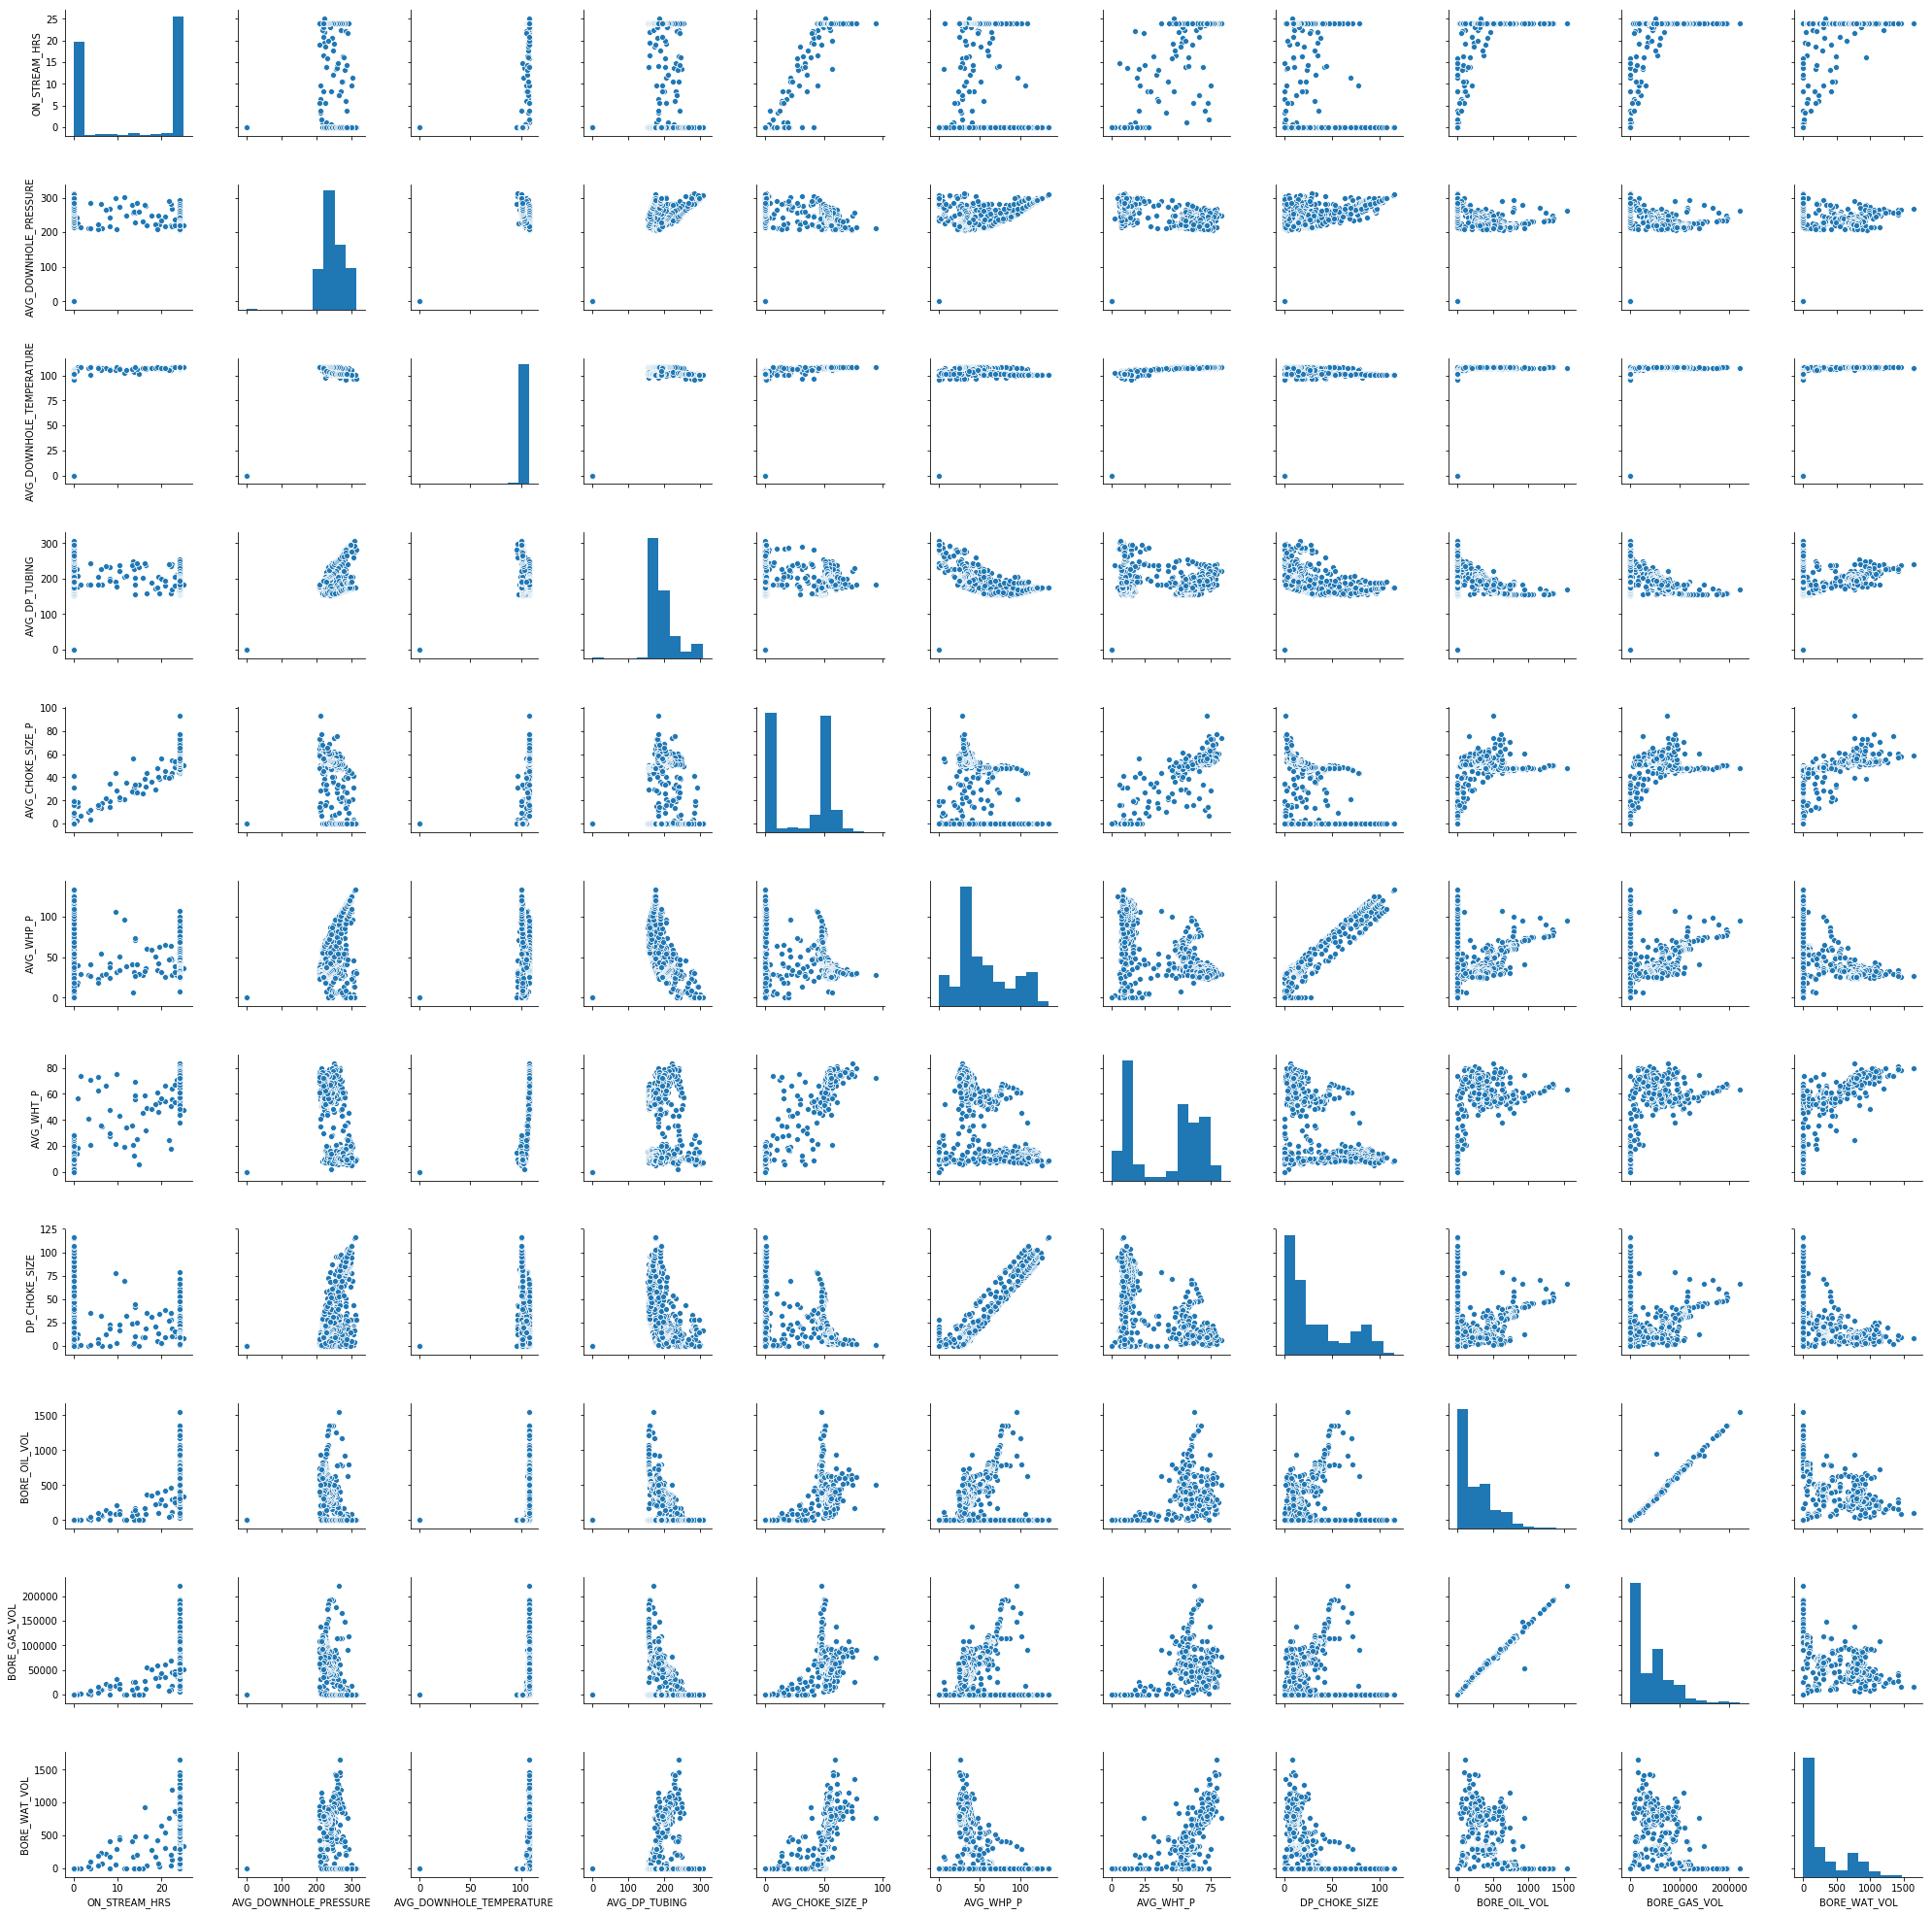

In [17]:
"""
this plot will take a minute to generate, it might crash your computer if you try to run it on the entire producers
dataframe instead of just a single well at a time

"""
sns.pairplot(F1C.drop('DATEPRD', axis=1))